In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [4]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


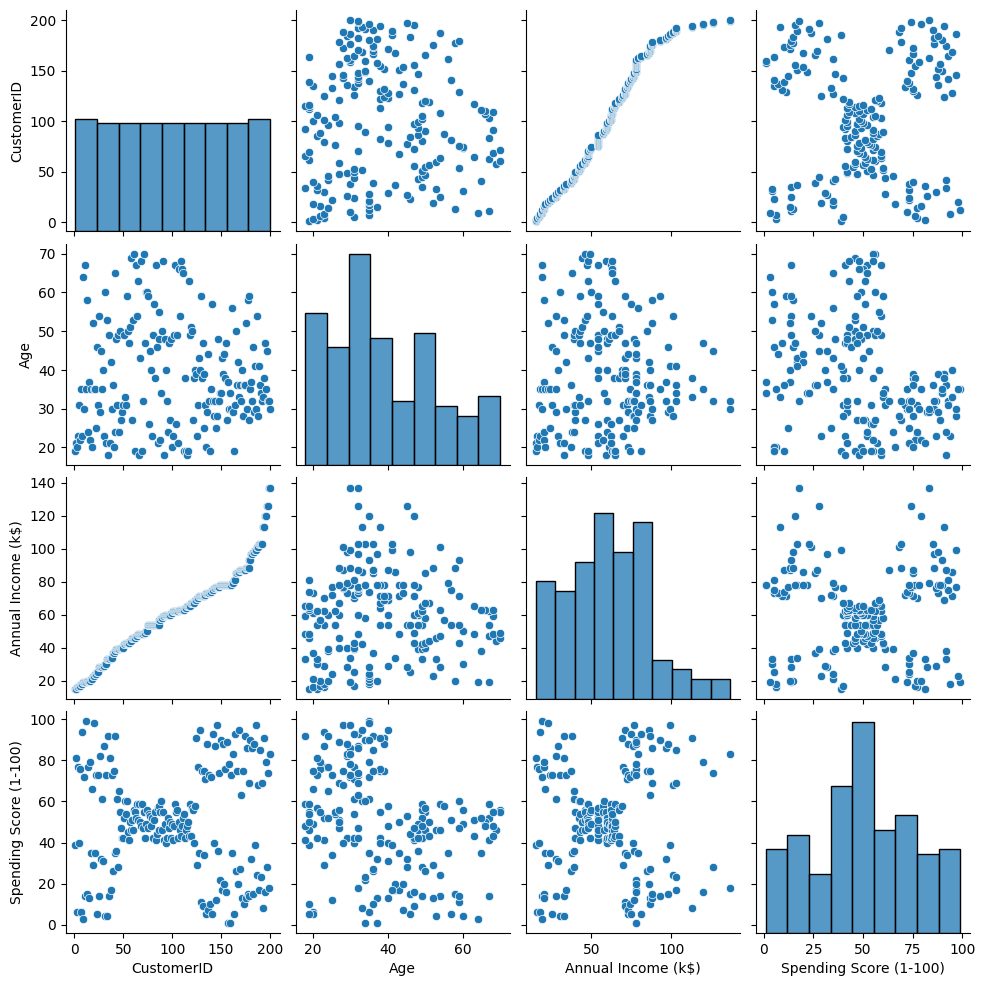

In [8]:
sns.pairplot(df)

In [9]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


<Axes: >

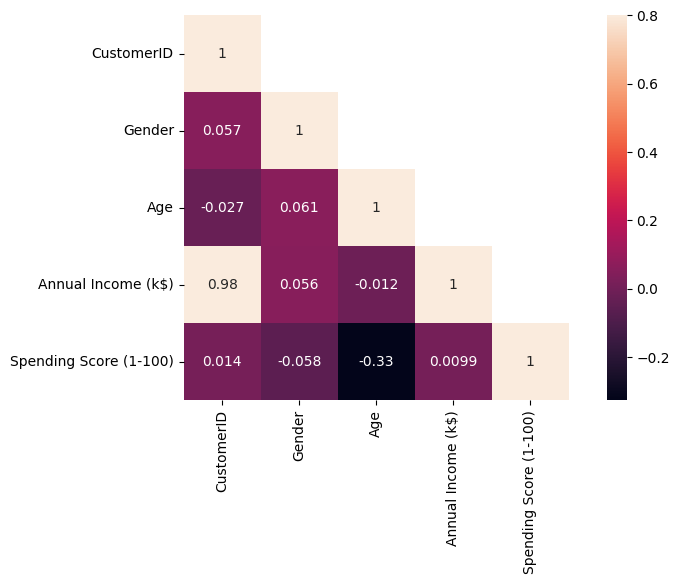

In [10]:
# Correlation analysis
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,5)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [11]:
#Splitting data

X = df.iloc[: , [3,4]].values #annual income and spending score

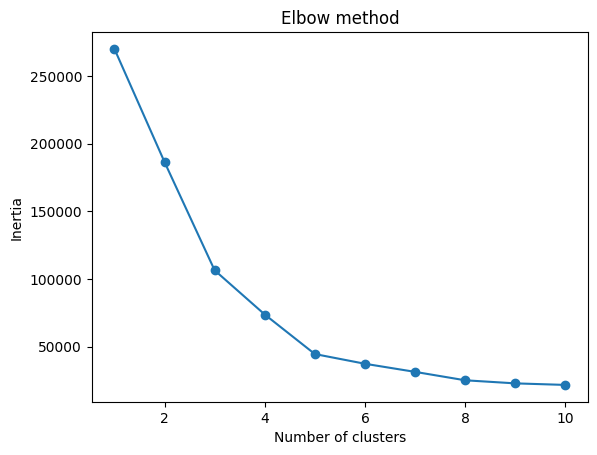

In [12]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [15]:
kmeans=KMeans(n_clusters=3,init="k-means++",random_state=42) #from elbow method we can choose num of cluster is 3
y_kmeans=kmeans.fit_predict(X)

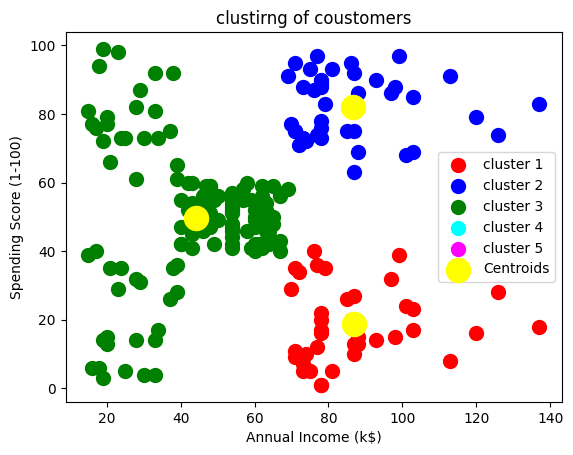

In [16]:
#plotting segmentaation

plt.scatter(X[y_kmeans ==0,0],X[y_kmeans==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X[y_kmeans ==1,0],X[y_kmeans==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X[y_kmeans ==2,0],X[y_kmeans==2,1],s=100,c='green',label='cluster 3')
plt.scatter(X[y_kmeans ==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='cluster 4')
plt.scatter(X[y_kmeans ==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label="Centroids")
plt.title("clustirng of coustomers")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

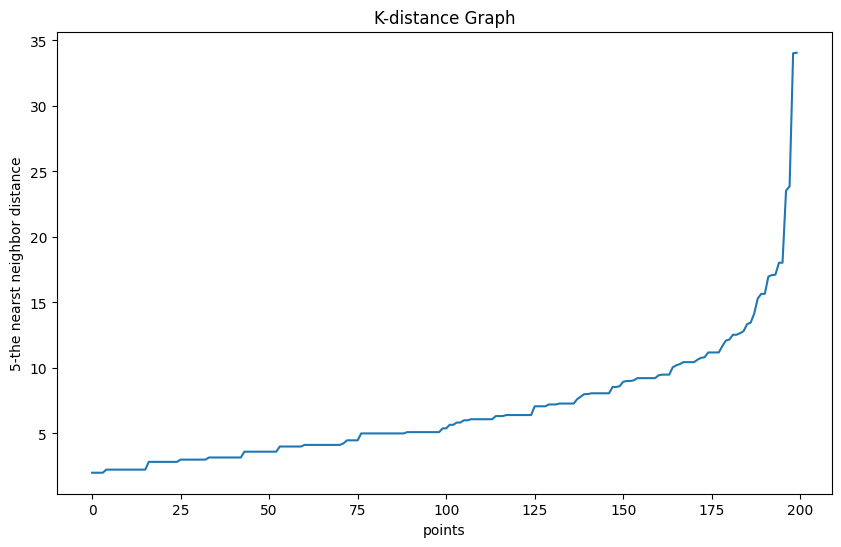

In [17]:
#calculate distance

from sklearn.neighbors import NearestNeighbors

def plot_K_distance(X,K):
    neigh=NearestNeighbors(n_neighbors=K)
    neigh.fit(X)
    distance,_=neigh.kneighbors(X)
    distance=np.sort(distance[:,K-1])

    plt.figure(figsize=(10,6))
    plt.plot(distance)
    plt.xlabel("points")
    plt.ylabel(f"{K}-the nearst neighbor distance")
    plt.title('K-distance Graph')
    plt.show()
plot_K_distance(X,K=5)

Bonus task - Using DBSCAN

In [18]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=10,min_samples=3).fit(X)
core_sample=np.zeros_like(dbscan.labels_,dtype=bool)
core_sample[dbscan.core_sample_indices_]
labels=dbscan.labels_
clusters=dbscan.fit_predict(X)

In [19]:
from sklearn import metrics

n_cluter=len(set(labels))-(1 if -1 in labels else 0)
n_noise=list(labels).count(-1)
print('Estimated number of clusters: %d' % n_cluter)
print('Estimated number of noise points: %d' % n_noise)

Estimated number of clusters: 4
Estimated number of noise points: 10


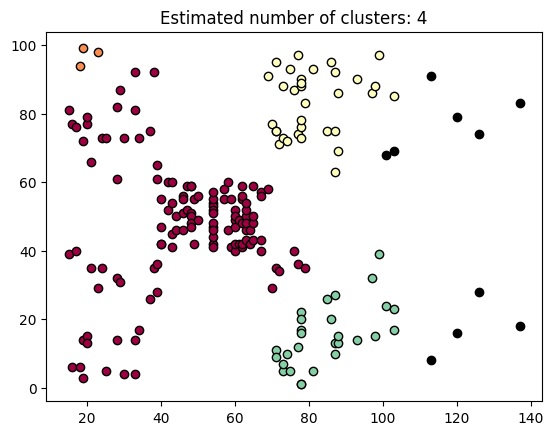

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_sample]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_sample]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_cluter)
plt.show()

In [21]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

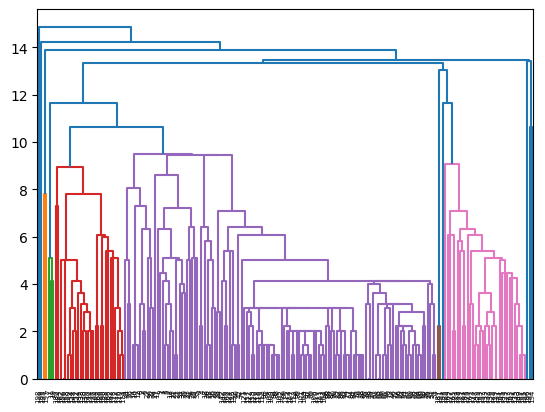

In [25]:
merge=linkage(X,method='single',metric="euclidean")
dendrogram(merge)
plt.show()

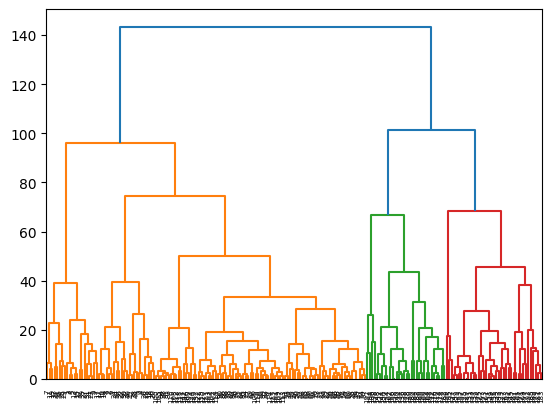

In [26]:
merge=linkage(X,method='complete',metric="euclidean")
dendrogram(merge)
plt.show()

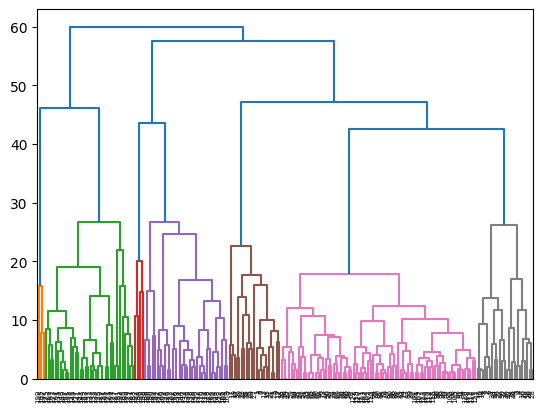

In [28]:
merge=linkage(X,method='average',metric="euclidean") #average spending in each cluster
dendrogram(merge)
plt.show()